# Initial Data Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("diabetes_dataset_with_notes.csv")

In [4]:
df.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,clinical_notes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0,"Overweight, advised dietary and exercise modif..."
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0,Healthy BMI range.
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0,"Young patient, generally lower risk but needs ..."
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0,"Overweight, advised dietary and exercise modif..."
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0,"Healthy BMI range. High HbA1c level, indicativ..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

In [6]:
df['smoking_history'].unique()

array(['never', 'not current', 'current', 'No Info', 'ever', 'former'],
      dtype=object)

In [7]:
df['smoking_history'].value_counts(dropna=False)

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [8]:
df['smoking_history'].value_counts(dropna=False)/df.shape[0]

smoking_history
No Info        0.35816
never          0.35095
former         0.09352
current        0.09286
not current    0.06447
ever           0.04004
Name: count, dtype: float64

Since 35% of the smoker data is is no info, smoking data is of no use in our prediction case

In [9]:
df = df.drop("smoking_history",axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  bmi                   100000 non-null  float64
 12  hbA1c_level           100000 non-null  float64
 13  blood_glucose_level   100000 non-null  int64  
 14  diabetes              100000 non-null  int64  
 15  c

In [11]:
df = df.drop(["clinical_notes","year"],axis=1)

- Clinical notes is a summary of the same numerical data present in the table, hence it is redundant so we drop it
- Year is the year of diagnosis/visit, which is irrelevant in diabetes prediction

In [13]:
df['location'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'United States', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [14]:
df['location'].value_counts(dropna=False)

location
Iowa                    2038
Nebraska                2038
Kentucky                2038
Hawaii                  2038
Florida                 2037
Minnesota               2037
New Jersey              2037
Arkansas                2037
Delaware                2036
Kansas                  2036
Michigan                2036
Massachusetts           2036
Maine                   2036
District of Columbia    2036
Louisiana               2036
Georgia                 2036
Oregon                  2036
Pennsylvania            2036
Alabama                 2036
Illinois                2036
Rhode Island            2035
Colorado                2035
Maryland                2035
New York                2035
Connecticut             2035
Mississippi             2035
Missouri                2035
Alaska                  2035
North Carolina          2035
New Hampshire           2035
North Dakota            2035
South Dakota            2033
Montana                 2033
New Mexico              2033
Idaho

In [15]:
df = df.drop("location",axis=1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   gender                100000 non-null  object 
 1   age                   100000 non-null  float64
 2   race:AfricanAmerican  100000 non-null  int64  
 3   race:Asian            100000 non-null  int64  
 4   race:Caucasian        100000 non-null  int64  
 5   race:Hispanic         100000 non-null  int64  
 6   race:Other            100000 non-null  int64  
 7   hypertension          100000 non-null  int64  
 8   heart_disease         100000 non-null  int64  
 9   bmi                   100000 non-null  float64
 10  hbA1c_level           100000 non-null  float64
 11  blood_glucose_level   100000 non-null  int64  
 12  diabetes              100000 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 9.9+ MB


In [17]:
df["gender"].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [18]:
df['gender'].value_counts(dropna=False)

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [19]:
other = df[df['gender'] == "Other"].index

In [20]:
len(other)

18

In [21]:
print(f"The percentage of non binary patients is {len(other)*100/len(df)}")

The percentage of non binary patients is 0.018


As this is less than 1%, we can safely drop those rows

In [22]:
df = df.drop(other,axis=0)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99982 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                99982 non-null  object 
 1   age                   99982 non-null  float64
 2   race:AfricanAmerican  99982 non-null  int64  
 3   race:Asian            99982 non-null  int64  
 4   race:Caucasian        99982 non-null  int64  
 5   race:Hispanic         99982 non-null  int64  
 6   race:Other            99982 non-null  int64  
 7   hypertension          99982 non-null  int64  
 8   heart_disease         99982 non-null  int64  
 9   bmi                   99982 non-null  float64
 10  hbA1c_level           99982 non-null  float64
 11  blood_glucose_level   99982 non-null  int64  
 12  diabetes              99982 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 10.7+ MB


In [24]:
df = pd.get_dummies(df, columns=['gender'], drop_first=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99982 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   99982 non-null  float64
 1   race:AfricanAmerican  99982 non-null  int64  
 2   race:Asian            99982 non-null  int64  
 3   race:Caucasian        99982 non-null  int64  
 4   race:Hispanic         99982 non-null  int64  
 5   race:Other            99982 non-null  int64  
 6   hypertension          99982 non-null  int64  
 7   heart_disease         99982 non-null  int64  
 8   bmi                   99982 non-null  float64
 9   hbA1c_level           99982 non-null  float64
 10  blood_glucose_level   99982 non-null  int64  
 11  diabetes              99982 non-null  int64  
 12  gender_Male           99982 non-null  bool   
dtypes: bool(1), float64(3), int64(9)
memory usage: 10.0 MB


In [26]:
df.head()

,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes,gender_Male
0,32.0,0,0,0,0,1,0,0,27.32,5.0,100,0,False
1,29.0,0,1,0,0,0,0,0,19.95,5.0,90,0,False
2,18.0,0,0,0,0,1,0,0,23.76,4.8,160,0,True
3,41.0,0,0,1,0,0,0,0,27.32,4.0,159,0,True
4,52.0,1,0,0,0,0,0,0,23.75,6.5,90,0,False


In [27]:
df["gender_Male"] = df["gender_Male"].astype(int)
df.head()

,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes,gender_Male
0,32.0,0,0,0,0,1,0,0,27.32,5.0,100,0,0
1,29.0,0,1,0,0,0,0,0,19.95,5.0,90,0,0
2,18.0,0,0,0,0,1,0,0,23.76,4.8,160,0,1
3,41.0,0,0,1,0,0,0,0,27.32,4.0,159,0,1
4,52.0,1,0,0,0,0,0,0,23.75,6.5,90,0,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99982 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   99982 non-null  float64
 1   race:AfricanAmerican  99982 non-null  int64  
 2   race:Asian            99982 non-null  int64  
 3   race:Caucasian        99982 non-null  int64  
 4   race:Hispanic         99982 non-null  int64  
 5   race:Other            99982 non-null  int64  
 6   hypertension          99982 non-null  int64  
 7   heart_disease         99982 non-null  int64  
 8   bmi                   99982 non-null  float64
 9   hbA1c_level           99982 non-null  float64
 10  blood_glucose_level   99982 non-null  int64  
 11  diabetes              99982 non-null  int64  
 12  gender_Male           99982 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 10.7 MB


In [29]:
# Create a list of your race columns
race_columns = [
    'race:AfricanAmerican', 'race:Asian', 'race:Caucasian', 
    'race:Hispanic', 'race:Other'
]

# Create a new single column called 'race'
# idxmax returns the column name with the highest value (the 1) for each row
# .str.replace cleans up the prefix to leave just the race name
df['race'] = df[race_columns].idxmax(axis=1).str.replace('race:', '')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Other'),
  Text(1, 0, 'Asian'),
  Text(2, 0, 'Caucasian'),
  Text(3, 0, 'AfricanAmerican'),
  Text(4, 0, 'Hispanic')])

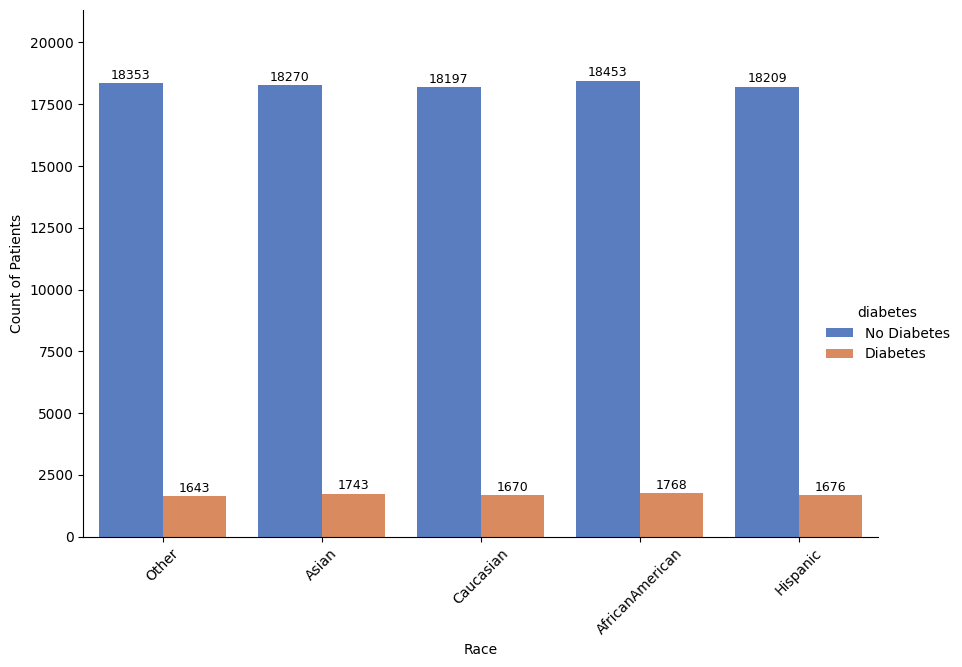

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' and 'diabetes' columns are correctly defined in your environment
# race_columns is not directly used in the plotting code, but kept for context
race_columns = [
    'race:AfricanAmerican', 'race:Asian', 'race:Caucasian', 
    'race:Hispanic', 'race:Other'
]

# Create the plot
g = sns.catplot(
    data=df,
    x='race',          # Put Race on the X-axis
    hue='diabetes',    # Group bars by Diabetes status (this creates the side-by-side look)
    kind='count',      # Count the number of people
    height=6,
    aspect=1.5,
    palette='muted'    # Optional: Makes the colors look nicer
)

# --- Code to add counts on top of bars ---
# Get the single axes object from the FacetGrid
ax = g.axes.flat[0]

# Iterate through the bar containers and add annotations
for container in ax.containers:
    # container is a PatchCollection (a set of bars for one hue group)
    for p in container.patches:
        height = p.get_height()
        # Only annotate if the height (count) is greater than zero
        if height > 0:
            ax.text(
                p.get_x() + p.get_width() / 2., # x-position: center of the bar
                height + 50,                    # y-position: a little above the top of the bar
                f'{height:.0f}',                # The count value (formatted as integer)
                ha='center',                    # Horizontal alignment: center
                va='bottom',                    # Vertical alignment: bottom
                fontsize=9                      # Smaller font size for clarity
            )

# Optional: Rename the legend to be more readable
new_labels = ['No Diabetes', 'Diabetes']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

g.set_axis_labels("Race", "Count of Patients")
# Adjust y-axis limit to make room for the annotations at the top of the tallest bar
# You may need to manually adjust this based on your maximum count
ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 
# ----------------------------------------
plt.xticks(rotation=45)

In [31]:
df.columns

Index(['age', 'race:AfricanAmerican', 'race:Asian', 'race:Caucasian',
       'race:Hispanic', 'race:Other', 'hypertension', 'heart_disease', 'bmi',
       'hbA1c_level', 'blood_glucose_level', 'diabetes', 'gender_Male',
       'race'],
      dtype='object')

In [32]:
df = df.drop(['race:AfricanAmerican', 'race:Asian', 'race:Caucasian',
       'race:Hispanic', 'race:Other'],axis=1)

As the dataset is pretty balanced across race, we will artifically modify the dataset to make it imbalanced for real world deployment scenarios

In [34]:
df.to_csv('diabetes_cleaned.csv')